# 말과 사람 이미지 분류하기

### 구글 드라이브 연동

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 데이터셋 살펴보기

- 경로와 파일명

In [7]:
import pandas as pd
import numpy as np
import os

# horses/humans 데이터셋 경로 지정
train_horses_dir = '/content/drive/MyDrive/horse-or-human/horses_dt'
train_humans_dir = '/content/drive/MyDrive/horse-or-human/humans_dt'

# horses 파일 이름 리스트
train_horse_names = os.listdir(train_horses_dir)
train_human_names = os.listdir(train_humans_dir)
print(train_horse_names)
print(train_human_names)

print('total training horse images:',len(os.listdir(train_horses_dir)))
print('total training human images:',len(os.listdir(train_humans_dir)))

['horse01-3.png', 'horse01-2.png', 'horse01-1.png', 'horse01-4.png', 'horse01-0.png', 'horse01-5.png', 'horse02-1.png', 'horse02-0.png', 'horse01-9.png', 'horse01-8.png', 'horse01-6.png', 'horse01-7.png', 'horse02-5.png', 'horse02-3.png', 'horse02-4.png', 'horse02-2.png', 'horse03-0.png', 'horse02-7.png', 'horse02-6.png', 'horse02-9.png', 'horse02-8.png', 'horse03-4.png', 'horse03-2.png', 'horse03-1.png', 'horse03-3.png', 'horse03-5.png', 'horse03-6.png', 'horse03-8.png', 'horse04-3.png', 'horse03-7.png', 'horse04-4.png', 'horse04-2.png', 'horse03-9.png', 'horse04-1.png', 'horse04-0.png', 'horse04-9.png', 'horse05-1.png', 'horse04-5.png', 'horse04-6.png', 'horse04-8.png', 'horse05-0.png', 'horse04-7.png', 'horse05-6.png', 'horse05-7.png', 'horse05-2.png', 'horse05-5.png', 'horse05-8.png', 'horse05-9.png', 'horse05-3.png', 'horse06-0.png', 'horse05-4.png', 'horse06-9.png', 'horse06-1.png', 'horse06-4.png', 'horse06-2.png', 'horse06-7.png', 'horse06-8.png', 'horse06-3.png', 'horse07-0.pn

말/사람 이미지 데이터셋이 포함된 경로를 각각 train_horse_dir, train_human_dir에 지정합니다.

os.listdir()을 이용해서 경로에 포함된 파일 이름을 리스트 형태로 불러올 수 있습니다.

이 리스트의 길이를 각각 확인해보면 말 이미지가 500개, 사람 이미지가 527개 있음을 알 수 있습니다.

### 이미지 확인하기

https://www.delftstack.com/ko/howto/matplotlib/display-an-image-with-matplotlib-python/

https://engineer-mole.tistory.com/215

https://codechacha.com/ko/python-join-path-filename/

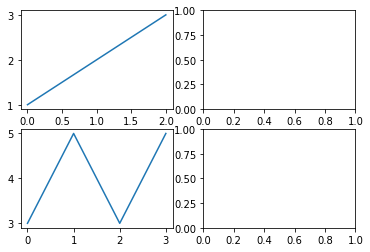

In [9]:
# fig, axes = plt.subplots(2,2)
# axes[0,0].plot([1,2,3])
# axes[1,0].plot([3,5,3,5])

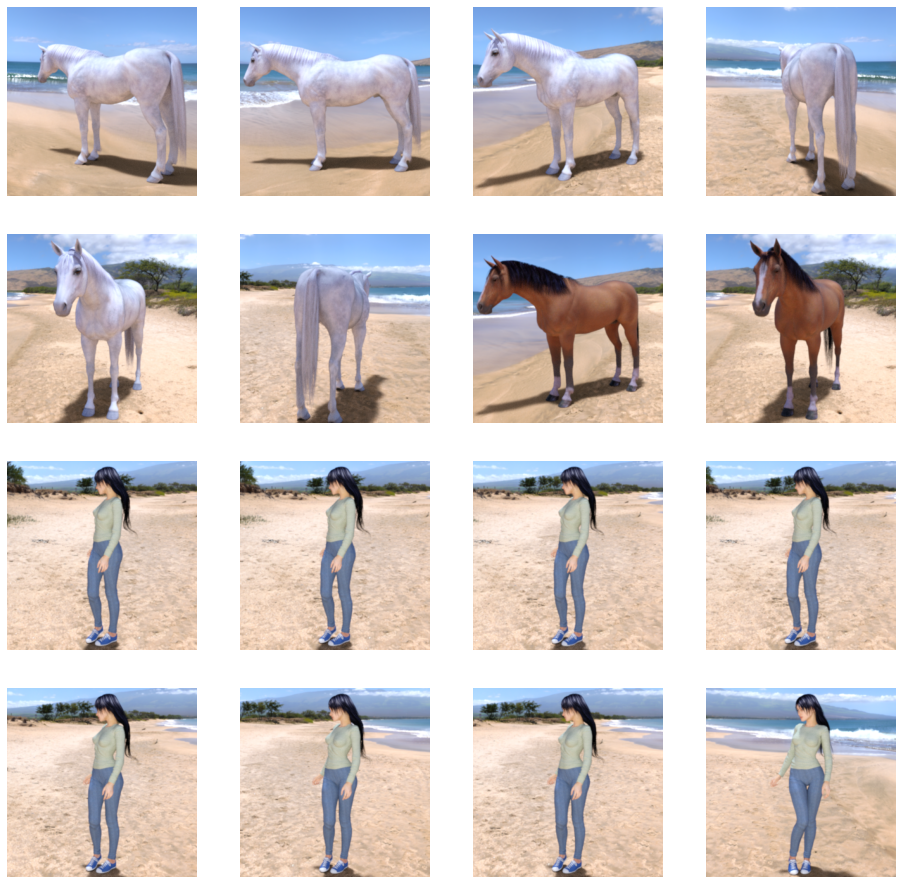

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf() # 현재 figure를 확인하기 위한 방법, gcf는 get current figure의 약어로 현재 figure 배경을 불러옴
fig.set_size_inches(ncols * 4, nrows * 4) # figure가 이미 생성된 경우, set_size_inches를 사용해서 현재 배경 크기 설정 가능 -> (4*4 X 4*4) 16 X 16

pic_index += 8

# 디렉토리 경로에 파일 이름을 조합하고 그 path를 리턴함
# os.path.join(절대 경로(제일 상위의 디렉토리로부터의 경로를 모두 적혀있는 경로), file이름)
next_horse_pix = [os.path.join(train_horses_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]] # 0:8
next_human_pix = [os.path.join(train_humans_dir, fname) for fname in train_human_names[pic_index-8:pic_index]] # 8개 경로를 불러옴

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1) # 4,4,i+1
  sp.axis('off') #축 제거

  img = mpimg.imread(img_path) # 경로 읽기
  plt.imshow(img) # 이미지 불러오기

plt.show()

# 모델 구성하기

이제 이미지 분류와 훈련을 위한 합성곱 신경망 (Convolutional Neural Network)을 구성합니다.

In [21]:
import tensorflow as tf

model = tf.keras.Sequential([
    # The firt convolution
    tf.keras.layers.Conv2D(filters = 16, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(300, 300, 3)),
    # padding을 주지않아서 300*300 에서 298*298로 차원이 축소됨 (padding='same')
    tf.keras.layers.MaxPool2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(2,2),
    # Flatten
    tf.keras.layers.Flatten(),
    # 512 Neuron (Hidden layer)
    tf.keras.layers.Dense(units = 512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units = 1, activation=tf.nn.sigmoid)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

다섯 단계의 합성곱 뉴런층과 두 단계의 Dense층으로 전체 합성곱 신경망을 구성했습니다.

model.summary()를 통해서 모델의 각 뉴런층과 Output shape을 얻을 수 있습니다.

# 모델 컴파일하기

모델 컴파일 과정에서는 앞에서 구성한 합성곱 신경망의 손실함수 (loss function)와 옵티마이저(optimizer)를 설정합니다. 

In [22]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


지금까지 다루었던 예제와 다르게 손실 함수로 binary_crossentropy를 사용했습니다.

출력층의 활성화함수로 sigmoid를 사용해고, 이는 0과 1 두 가지로 분류되는 binary 분류 문제에 적합하기 때문입니다.

또한, 옵티마이저로는 RMSprop를 사용했습니다.

RMSprop(Root Mean Square Propagation) Algorithm은 훈련 과정 중에 학습률을 적절하게 변화 시킵니다.

# 이미지 데이터 전처리하기

훈련을 진행하기 전, tf.keras.preprocessing.image 모듈의 ImageDataGenerator 클래스를 이용해서 데이터 전처리를 진행합니다.

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


rescale 파라미터는 이미지 데이터에 곱해질 값을 설정합니다.

ImageDataGenerator 클래스의 flow_from_directory 메서드는 이미지 데이터셋의 경로를 받아서, 데이터의 배치를 만들어냅니다.

# 모델 훈련하기


fit() 메서드에 train_generator 객체를 입력하고 훈련을 시작합니다.

In [27]:
history = model.fit(train_generator, steps_per_epoch=8, epochs=15, verbose=1)

Epoch 1/15
8/8 [==============================] - 357s 41s/step - loss: 0.8274 - accuracy: 0.5495
Epoch 2/15
8/8 [==============================] - 69s 10s/step - loss: 0.8522 - accuracy: 0.5306
Epoch 3/15
8/8 [==============================] - 69s 8s/step - loss: 0.5432 - accuracy: 0.7419
Epoch 4/15
8/8 [==============================] - 78s 10s/step - loss: 0.4760 - accuracy: 0.7656
Epoch 5/15
8/8 [==============================] - 70s 8s/step - loss: 0.2160 - accuracy: 0.9366
Epoch 6/15
8/8 [==============================] - 70s 8s/step - loss: 0.1791 - accuracy: 0.9355
Epoch 7/15
8/8 [==============================] - 70s 9s/step - loss: 0.2011 - accuracy: 0.9121
Epoch 8/15
8/8 [==============================] - 70s 9s/step - loss: 0.2463 - accuracy: 0.9121
Epoch 9/15
8/8 [==============================] - 70s 8s/step - loss: 0.0874 - accuracy: 0.9755
Epoch 10/15
8/8 [==============================] - 70s 8s/step - loss: 0.1257 - accuracy: 0.9522
Epoch 11/15
8/8 [==================